# Librerie

In [ ]:
!pip install dash
!pip install visdcc
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 69.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.8/518.8 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdcc: filename=visdcc-0.0.50-py3-none-any.whl size=518238 sha256=c76093ed4afd1cfd3cd60eecd137cbfce914893a378c2cb6709c76d3beefcf0a
  Stored in directory: /root/.cache/pip/wheels/0f/47/14/0c1bb282f77b43a1dacb5da14a61ee94edec34d74c1f1602f9
Successfully built visdcc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00


In [ ]:
# importo tutte le librerie necessarie per lo svolgimento dell'analisi
import pandas as pd
import networkx as nx
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import visdcc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from pyvis.network import Network
from tabulate import tabulate

<ipython-input-2-ecd693f7bc72>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-ecd693f7bc72>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Letture dei dataset

In [ ]:
# leggo il datasets/book1.csv
book1 = pd.read_csv('/books/book1.csv')

# stampo le prime righe del dataset per capirne la struttura
print(book1.head())

# creo un nuovo grafo vuoto
G_book1 = nx.Graph()

# integro nel dataset per aggiungere gli archi
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# creo la lista di reti per ogni libro e quindi dataset
books = [G_book1]
book_fnames = ['/books/book2.csv', '/books/book3.csv', '/books/book4.csv', '/books/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


# Top 10 per degree centrality


In [ ]:
# degree centrality del libro 1
deg_cen_book1 = nx.degree_centrality(books[0])

# degree centrality del libro 5
deg_cen_book5 = nx.degree_centrality(books[4])

# ordino i dizionari rispetto alla loro degree centrality e ordino i primi 10 elementi
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# print dei primi dieci elementi per ciascun libro
# print(sorted_deg_cen_book1)
# print(sorted_deg_cen_book5)
print(tabulate(sorted_deg_cen_book1))
print(tabulate(sorted_deg_cen_book5))

-----------------  --------
Eddard-Stark       0.354839
Robert-Baratheon   0.268817
Tyrion-Lannister   0.247312
Catelyn-Stark      0.231183
Jon-Snow           0.198925
Robb-Stark         0.188172
Sansa-Stark        0.188172
Bran-Stark         0.172043
Cersei-Lannister   0.16129
Joffrey-Baratheon  0.16129
-----------------  --------
------------------  ---------
Jon-Snow            0.196203
Daenerys-Targaryen  0.183544
Stannis-Baratheon   0.148734
Tyrion-Lannister    0.10443
Theon-Greyjoy       0.10443
Cersei-Lannister    0.0886076
Barristan-Selmy     0.0791139
Hizdahr-zo-Loraq    0.0696203
Asha-Greyjoy        0.056962
Melisandre          0.0537975
------------------  ---------


# Centralità dei personaggi

# Degree centrality

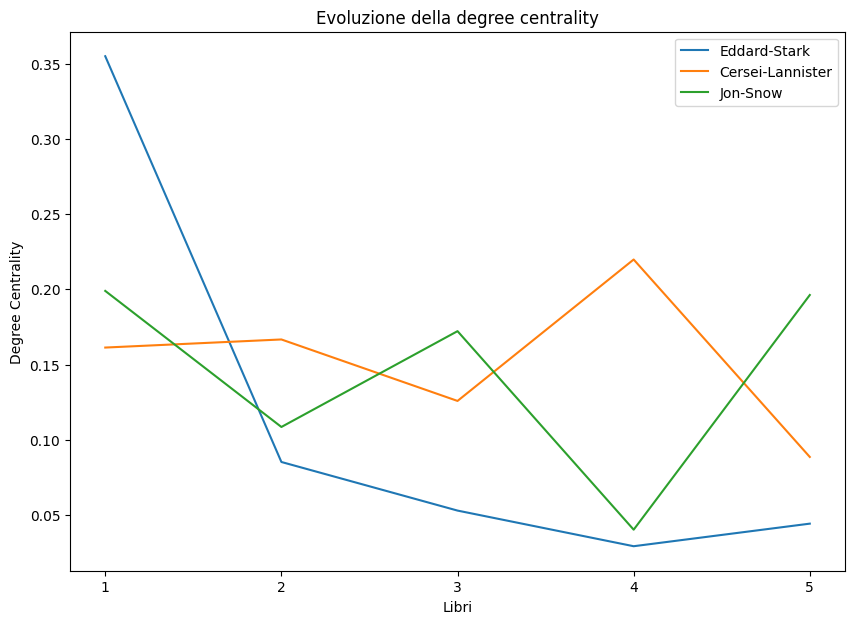

In [ ]:
%matplotlib inline

# creazione della lista della degree centrality di tutti i libri
evol = [nx.degree_centrality(book) for book in books]

# creazione di un dataframe dalla lista
degree_evol_df = pd.DataFrame.from_records(evol, index=[1, 2, 3, 4, 5])

# grafico dell'evoluzione della degree centrality di Eddard-Stark, Cersei-Lannister e Jon-Snow
degree_evol_df[["Eddard-Stark", "Cersei-Lannister", "Jon-Snow"]].plot(figsize=[10,7], fontsize= 10)
plt.xticks([1, 2, 3, 4, 5]);
plt.xlabel("Libri");
plt.ylabel("Degree Centrality");
plt.title("Evoluzione della degree centrality");

# Betwenness centrality




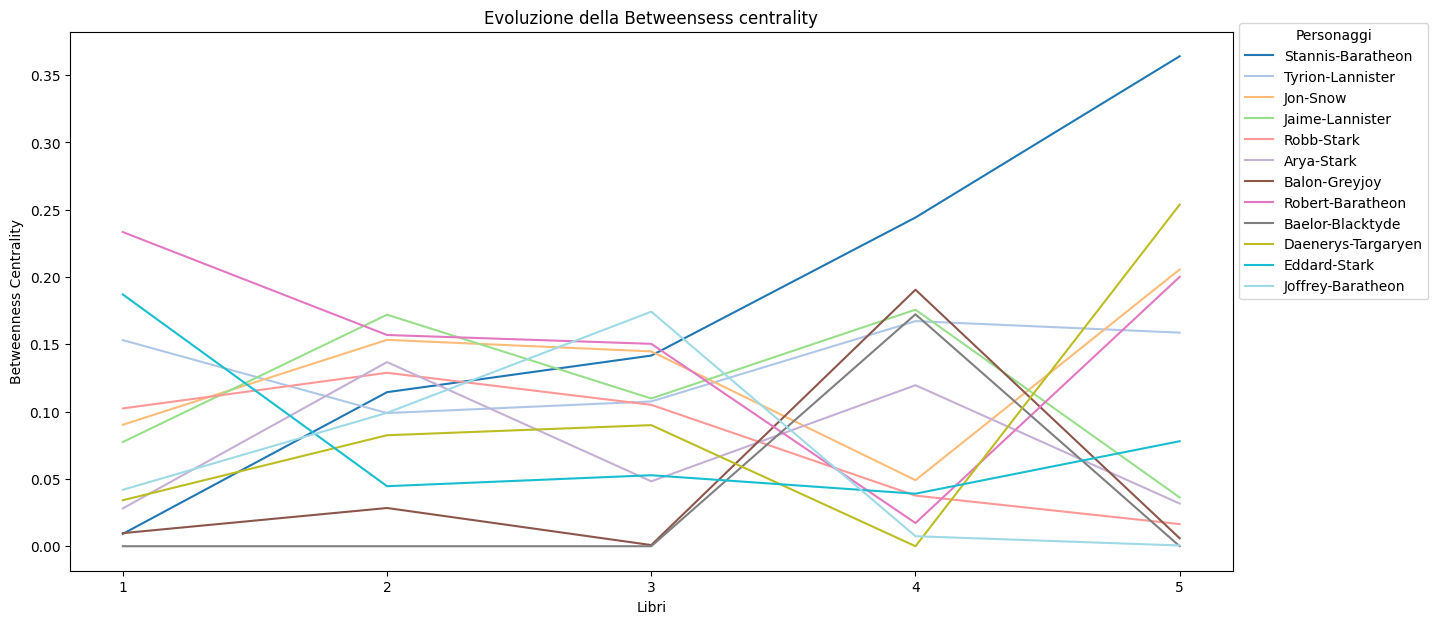

In [ ]:
# creazione delle lista con i valori della betweenness centrality di tutti i libri come ho fatto per la degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# dataframe dalla lista
betweenness_evol_df = pd.DataFrame.from_records(evol, index=[1, 2, 3, 4, 5])

# trovo i quattro personaggi più rilevanti in ogni libro (per la betwenness)
set_of_char = set()
for i in range(1,6):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# grafico dell'evoluzione dei personaggi nei libri per la misura della betwenness centrality
betweenness_evol_df[list_of_char].fillna(0).plot(figsize=[15,7], fontsize= 10, colormap="tab20");
plt.xticks([1, 2, 3, 4, 5]);
plt.xlabel("Libri");
plt.ylabel("Betweenness Centrality");
plt.title("Evoluzione della Betweensess centrality");
plt.legend(title='Personaggi',title_fontsize=10,loc='center left', bbox_to_anchor=(1, 0.76));

# Page Rank

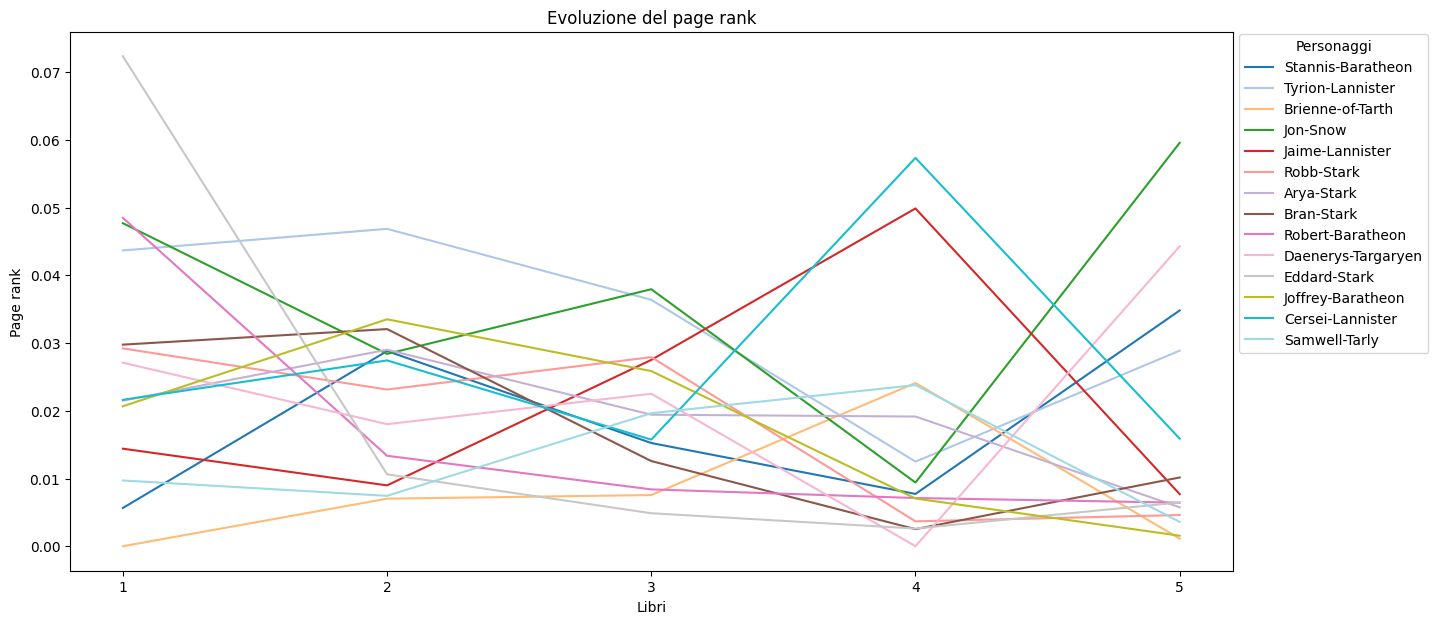

In [ ]:
# creazione delle lista con i valori della page rank di tutti i libri
evol = [nx.pagerank(book) for book in books]

# dataframe della lista
pagerank_evol_df = pd.DataFrame.from_records(evol, index=[1, 2, 3, 4, 5])

# trovo i quattro personaggi più rilevanti in ogni libro (per la pagerank)
set_of_char = set()
for i in range(1, 6):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# grafico dei personaggi in top 4
pagerank_evol_df[list_of_char].fillna(0).plot(figsize=[15,7], fontsize= 10, colormap="tab20");
plt.xticks([1, 2, 3, 4, 5]);
plt.xlabel("Libri");
plt.ylabel("Page rank");
plt.title("Evoluzione del page rank");
plt.legend(title='Personaggi',title_fontsize=10,loc='center left', bbox_to_anchor=(1, 0.7));

# Correlazione tra le misure

In [ ]:
# creo una lista con letre misure analizzate in precedenza di tutti i personaggi del quinto lirbo
measures = [nx.pagerank(books[4]),
            nx.betweenness_centrality(books[4], weight='weight'),
            nx.degree_centrality(books[4])]

# creo il dataframe della correlazione
cor = pd.DataFrame.from_records(measures, index=["Page_rank", "Betweenness_Centrality", "Degree_centrality"])

# calcolo la correlazione
cor.T.corr()

,Page_rank,Betweenness_Centrality,Degree_centrality
Page_rank,1.000000,0.793372,0.971493
Betweenness_Centrality,0.793372,1.000000,0.833816
Degree_centrality,0.971493,0.833816,1.000000


In [ ]:
# trovo il personaggio più importante del quinto libro
#stando alla pagerank, betweenness e degree centrality
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

#stampo a schermo il personaggio più importante stando alle tre misure
print('Personaggio più importante per la Page Rank: "{0}"\nPersonaggio più importante per la Betweenness centrality: "{1}"\nPersonaggio più importante per la Degree centrality : "{2}"\n\n'.format(p_rank, b_cent, d_cent))

Personaggio più importante per la Page Rank: "Jon-Snow"
Personaggio più importante per la Betweenness centrality: "Stannis-Baratheon"
Personaggio più importante per la Degree centrality : "Jon-Snow"




# Analisi delle cliques

In [ ]:
book = pd.read_csv('/books/bookgot.csv')
G = nx.from_pandas_edgelist(book,
                            source='Source',
                            target='Target',
                            edge_attr='Weight')

In [ ]:
# trovo tutte le cliques del grafo
cliques = list(nx.find_cliques(G))
print(tabulate(cliques))


---------------------------------------  --------------------------------  --------------------------------  --------------------------------  -------------------------------  ------------------  ------------------  -----------------  ----------------  -----------------  -----------------  --------------  -------------  ----------
Alyn                                     Jory-Cassel                       Eddard-Stark                      Harwin
Alyn                                     Jory-Cassel                       Eddard-Stark                      Robert-Baratheon
Alyn                                     Jory-Cassel                       Eddard-Stark                      Tomard
Halder                                   Jon-Snow                          Albett                            Rast
Halder                                   Jon-Snow                          Pypar                             Grenn                             Todder
Halder                                   Jon-

In [ ]:
# trovo la/le cliques massime
l_massima = 0
lista = []
for i in cliques:
  if len(i) >= l_massima:
    l_massima = len(i)

for i in cliques:
  if len(i) == l_massima:
    lista.append(i)
n_clique = len(lista)
print("il numero di cliques massime è ", n_clique)
print("la clique massima ha grandezza pari a", l_massima)
print("la clique è formata da i seguenti personaggi :\n", lista)

il numero di cliques massime è  1
la clique massima ha grandezza pari a 14
la clique è formata da i seguenti personaggi :
 [['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Jaime-Lannister', 'Robert-Baratheon', 'Eddard-Stark', 'Petyr-Baelish', 'Renly-Baratheon', 'Stannis-Baratheon', 'Tywin-Lannister', 'Varys', 'Catelyn-Stark', 'Robb-Stark']]


# Altre rappresentazioni grafiche

In [ ]:
# opzioni grafiche
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]
selected_graph_option = 0

# plot
plt.figure(figsize=(60,60), dpi=100)
graphs_viz_options[selected_graph_option](G)

In [ ]:
# rappresentazione grafica tramite html
net = Network(notebook = True, cdn_resources='remote')
net.from_nx(G)
net.show("got.html")

# senza eseguire è un allegato nella consegna